Jeanette Walangitan

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("DATA_KOMENTAR_EMOSI_CLEANED (1).csv")

# Lihat kolom
print(df.columns)


Index(['comment_text', 'Emosi', 'TEXT_CLEANED'], dtype='object')


# **NORMALISASI TEKS**

## TYPO

In [19]:
import pandas as pd
import re

# === 1. Load dataset ===
df = pd.read_csv("DATA_KOMENTAR_EMOSI_CLEANED (1).csv")

# === 2. Fungsi perbaikan typo dan normalisasi ===
def fix_typo_regex(text):
    text = str(text).lower().strip()

    # Hapus karakter non-alfabet (selain spasi)
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text)

    # Hilangkan huruf berulang >2x (bangettt → banget)
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # Hilangkan vokal berulang >1x (senaaang → senang)
    text = re.sub(r'([aeiou])\1{2,}', r'\1', text)

    # Hilangkan konsonan berulang >1x (gemesss → gemes)
    text = re.sub(r'([^aeiou\s])\1{1,}', r'\1', text)

    # Bersihkan tawa dan ekspresi umum
    text = re.sub(r'\b(ha|he|hi|ho|hu){2,}\b', 'haha', text)
    text = re.sub(r'\b(wk|kw){2,}\b', 'haha', text)
    text = re.sub(r'\b(xi|xix|xixi){1,}\b', 'haha', text)

    return text.strip()

# === 3. Terapkan ke kolom TEXT_CLEANED ===
df['TEXT_NORM'] = df['TEXT_CLEANED'].apply(fix_typo_regex)

# === 4. Lihat tabel perbandingan sebelum dan sesudah ===
print(df[['TEXT_CLEANED', 'TEXT_NORM']].head(20))

# === 5. Simpan hasil (opsional) ===
df.to_csv("DATA_KOMENTAR_EMOSI_NORMALIZED.csv", index=False)
print("✅ Normalisasi selesai! Hasil disimpan di DATA_KOMENTAR_EMOSI_NORMALIZED.csv")


                                         TEXT_CLEANED  \
0                                sumpah seru bangettt   
1                  masih ada yang nonton oktober cung   
2   baru jam udh jt aja viewernya wkkwwk mntap hal...   
3                         nonton sampai akhir seruuuu   
4                              happy sih aku like dah   
5       salfok vidi pakai jam ndk si maaf kalau salah   
6                  undang lagi dong halda dan jirayut   
7                            semoga kapal ku berlayar   
8   sumpah ih suka bangeeet episod kali ini pecaaaaah   
9                                      jam sudah juta   
10               nntn jirayut sm alda bikin skt perut   
11                                             kerenn   
12                             bikinin episode nya ga   
13                               aaaa gua paling suka   
14                                    jam udh jt lbih   
15                             hahaha ngakak bangettt   
16                             

## NORMALISASI SLANG

In [20]:
import pandas as pd
import re
from textblob import TextBlob

# 1. Kamus slang Indonesia
slang_dict = {
    # ===== Negasi & Kata Umum =====
    'gk': 'tidak', 'ga': 'tidak', 'ngga': 'tidak', 'gak': 'tidak', 'kagak': 'tidak',
    'tdk': 'tidak', 'engga': 'tidak', 'ndak': 'tidak', 'nda': 'tidak', 'g': 'tidak',
    'tak': 'tidak', 'ngk': 'tidak', 'gkz': 'tidak', 'gakk': 'tidak',
    'gapapa': 'tidak apa apa', 'gapape': 'tidak apa apa', 'gpp': 'tidak apa apa',
    'gaada': 'tidak ada', 'gkada': 'tidak ada', 'gakada': 'tidak ada',
    'gausah': 'tidak usah', 'gusah': 'tidak usah', 'gaperlu': 'tidak perlu',
    'gtw': 'tidak tahu', 'gatau': 'tidak tahu', 'gatw': 'tidak tahu', 'gtao': 'tidak tahu',
    'idk': 'tidak tahu',
    'idc': 'tidak peduli',
    'bodoamat': 'cuek', 'bodo': 'bodoh',

    # ===== Intensitas & Emosi =====
    'bgt': 'banget', 'bngt': 'banget', 'bgtt': 'banget', 'bget': 'banget',
    'bangett': 'banget', 'bangettt': 'banget', 'bangeet': 'banget', 'bnget': 'banget',
    'bangeeet': 'banget', 'bangetttt': 'banget', 'bgttt': 'banget', 'bgtsss': 'banget',
    'parahh': 'parah', 'parahhh': 'parah', 'sngt': 'sangat',
    'beneran': 'benar', 'bener2': 'benar benar', 'seru2': 'seru banget',
    'terharuu': 'terharu', 'terharuuu': 'terharu', 'merindingg': 'merinding',
    'merindinggg': 'merinding', 'nangiss': 'nangis', 'nangisss': 'nangis', 'nangissss': 'nangis',
    'capekk': 'capek', 'capekkk': 'capek', 'capee': 'capek', 'capeee': 'capek',
    'sedihh': 'sedih', 'seneng': 'senang', 'senengg': 'senang',
    'bahagiaa': 'bahagia', 'sumpahh': 'sumpah', 'sumpaah': 'sumpah',
    'semangatt': 'semangat', 'semangattt': 'semangat', 'down': 'terpuruk',
    'benerann': 'benar', 'benerannn': 'benar', 'benerannnn': 'benar', 'bener': 'benar',
    'bner': 'benar', 'benern': 'benar',
    'seremm': 'seram', 'seremmm': 'seram', 'serem banget': 'seram sekali',
    'gilak': 'gila', 'gile': 'gila', 'gilaaa': 'gila', 'gillaa': 'gila',
    'ngeriih': 'ngeri', 'ngeriihh': 'ngeri', 'ngeriihhh': 'ngeri',
    'ngeri banget': 'ngeri sekali', 'takutt': 'takut', 'takuttt': 'takut',
    'sad': 'sedih', 'happy': 'bahagia', 'huhu': 'sedih',

    # ===== Waktu & Urutan =====
    'udh': 'sudah', 'udah': 'sudah', 'sdh': 'sudah', 'dah': 'sudah', 'udahh': 'sudah',
    'blm': 'belum', 'belom': 'belum',
    'dlu': 'dulu', 'dl': 'dulu', 'dlh': 'dulu', 'dluu': 'dulu',
    'skrg': 'sekarang', 'skg': 'sekarang', 'skrng': 'sekarang',
    'td': 'tadi', 'tad': 'tadi', 'tdi': 'tadi',
    'trs': 'terus', 'trus': 'terus',
    'nnti': 'nanti', 'ntar': 'nanti', 'nt': 'nanti',
    'ampe': 'sampai', 'mpe': 'sampai', 'sampe': 'sampai',
    'skalian': 'sekalian', 'abis': 'habis',
    'nextt': 'selanjutnya',

    # ===== Kata Sambung =====
    'tp': 'tapi', 'tpi': 'tapi', 'tpn': 'tapi',
    'pdhl': 'padahal',
    'krn': 'karena', 'krena': 'karena', 'soalnya': 'karena', 'soale': 'karena',
    'bcs': 'karena', 'bcuz': 'karena', 'cuz': 'karena', 'cus': 'karena',
    'sm': 'sama', 'ama': 'sama', 'sma': 'sama',
    'dgn': 'dengan', 'dg': 'dengan',
    'dr': 'dari', 'yg': 'yang', 'ny': 'nya',
    'biar': 'agar',
    'klo': 'kalau', 'kl': 'kalau', 'klu': 'kalau', 'klw': 'kalau', 'kalo': 'kalau',
    'ko': 'kok', 'loh': 'kok',
    'mlh': 'malah',
    'trnyta': 'ternyata', 'nyata': 'ternyata', 'nyatanya': 'ternyata',

    # ===== Pronomina & Panggilan =====
    'aku': 'saya', 'aq': 'saya', 'sy': 'saya', 'q': 'saya', 'ak': 'saya',
    'akuu': 'saya', 'akuuu': 'saya', 'akuuuu': 'saya', 'akuuuuu': 'saya',
    'gw': 'aku', 'gua': 'aku', 'gue': 'aku', 'gwe': 'aku',
    'lu': 'kamu', 'loe': 'kamu', 'lo': 'kamu', 'elo': 'kamu', 'elu': 'kamu', 'u': 'kamu', 'ur': 'kamu',
    'km': 'kamu', 'kmu': 'kamu',
    'kaliann': 'kalian', 'klian': 'kalian',
    'bang': 'abang', 'bangg': 'abang', 'banggg': 'abang', 'ngab': 'abang',
    'kak': 'kakak', 'kaka': 'kakak', 'ka': 'kakak', 'kk': 'kakak',
    'bro': 'teman', 'coy': 'teman', 'cuy': 'teman', 'coeg': 'teman', 'ges': 'teman',
    'guys': 'teman teman', 'sob': 'sobat', 'bestie': 'teman baik',

    # ===== Penunjuk / Kata Bantu =====
    'aj': 'saja', 'aja': 'saja', 'doang': 'saja', 'cuma': 'hanya',
    'ni': 'ini', 'nih': 'ini', 'nie': 'ini', 'nii': 'ini',
    'tu': 'itu', 'tuh': 'itu', 'ituu': 'itu', 'ituh': 'itu',
    'gitu': 'begitu', 'gini': 'begini', 'ginii': 'begini', 'gituu': 'begitu',
    'gituuu': 'begitu', 'gittuu': 'begitu', 'gituan': 'seperti itu',
    'bgtu': 'begitu', 'bgtuh': 'begitu',

    # ===== Ekspresi Umum (Interjeksi/Seruan) =====
    'anjir': 'astaga', 'anjay': 'astaga', 'anj': 'astaga', 'anjrit': 'astaga',
    'anjirr': 'astaga', 'anjirrr': 'astaga', 'anjirrrr': 'astaga', 'anjg': 'astaga',
    'anjgg': 'astaga', 'anjirrk': 'astaga', 'anjr': 'astaga', 'anjrot': 'astaga',
    'anjayy': 'astaga', 'anjayyy': 'astaga', 'anjrtt': 'astaga', 'anjggg': 'astaga',
    'anjingg': 'astaga', 'anjgk': 'astaga', 'anjrr': 'astaga', 'anjrrt': 'astaga',
    'anjjr': 'astaga', 'anjasmara': 'astaga',
    'astagfirullah': 'astaghfirullah', 'astaga': 'astaghfirullah',
    'yaallah': 'ya allah', 'yaallahh': 'ya allah', 'yaallahhh': 'ya allah', 'yaallahhhh': 'ya allah',
    'yaampun': 'ya ampun', 'yaampunn': 'ya ampun', 'yaampunnn': 'ya ampun',
    'yaampunnnn': 'ya ampun', 'yaampuun': 'ya ampun', 'ampun': 'ya ampun', 'ampunndeh': 'ya ampun',
    'masyaallah': 'masya allah', 'masyaallahh': 'masya allah',
    'subhanallah': 'subhanallah',
    'duh': 'aduh', 'huh': 'aduh', 'lahh': 'lah', 'lah': 'lah', 'aww': 'gemas', 'wow': 'wah',
    'yahh': 'yah', 'omg': 'ya tuhan', 'smh': 'geleng geleng',

    # ===== Tawa / Ekspresi Lucu =====
    'wkwk': 'haha', 'wkwkwk': 'haha', 'wk': 'haha', 'wkwkwkwk': 'haha',
    'wkwwkwk': 'haha', 'wkwwkkw': 'haha', 'wkwkwkwkwk': 'haha', 'lmao': 'haha',
    'hehe': 'haha', 'hihi': 'haha', 'haha': 'haha', 'hahahaha': 'haha',
    'hahaa': 'haha', 'hehehe': 'haha', 'hehehh': 'haha', 'xixi': 'haha',
    'ngakak': 'haha', 'ngakakk': 'haha', 'ngakakkk': 'haha', 'wkakkaka': 'haha',
    'wkwkwkwkwkwk': 'haha', 'kwkwkw': 'haha', 'wkwwk': 'haha', 'wkakwk': 'haha',
    'wkwkwkwkwkwkwk': 'haha', 'wkakak': 'haha', 'wkakaka': 'haha', 'wakaka': 'haha',
    'wkkwkwk': 'haha', 'kwkwkwk': 'haha', 'kwk': 'haha', 'xixixi': 'haha',
    'ckck': 'aduh', 'ckckck': 'aduh', 'hadeh': 'aduh', 'hadehh': 'aduh',
    'pecah': 'lucu banget', 'pecaah': 'lucu banget',
    'kocakk': 'lucu', 'kocakkk': 'lucu', 'kocakkkk': 'lucu',

    # ===== Serapan / Singkatan Umum =====
    'pls': 'tolong', 'plis': 'tolong', 'pliss': 'tolong', 'plisss': 'tolong',
    'plissss': 'tolong', 'plsdehh': 'tolong deh', 'plsdeh': 'tolong deh', 'plsss': 'tolong',
    'plsbgt': 'tolong banget', 'plsbgtt': 'tolong banget', 'tlg': 'tolong',
    'btw': 'ngomong ngomong', 'imo': 'menurut saya',
    'rip': 'istirahat dalam damai', 'samawa': 'sakinah mawaddah warahmah',
    'thx': 'terima kasih', 'tq': 'terima kasih', 'makasih': 'terima kasih',
    'makasi': 'terima kasih', 'makasiih': 'terima kasih', 'makasii': 'terima kasih',
    'mksih': 'terima kasih', 'mks': 'terima kasih', 'thanks': 'terima kasih',
    'ty': 'terima kasih', 'thnks': 'terima kasih', 'tnx': 'terima kasih',
    'thankyou': 'terima kasih', 'thanku': 'terima kasih', 'makasiiih': 'terima kasih',
    'makasiiihh': 'terima kasih', 'mntap ':'mantap', 'salfok': 'salah fokus', 'hapy':'happy', 'cung':'angkat tangan'

    # ===== Bahasa Campur Inggris =====
    'r': 'adalah', 'ya': 'iya', 'y': 'iya',
    'ok': 'oke', 'okay': 'oke', 'okey': 'oke', 'okeey': 'oke', 'okeee': 'oke',
    'ofc': 'tentu', 'relate': 'terkait', 'insecure': 'minder',
    'feeling': 'perasaan', 'story': 'cerita', 'sound': 'suara',
    'backsound': 'latar suara', 'goodlooking': 'menarik',
    'support': 'dukung', 'fyp': 'viral', 'vibes': 'suasana', 'chill': 'santai',
    'random': 'acak', 'content': 'konten', 'epic': 'keren',
    'worst': 'terburuk', 'relate banget': 'terkait sekali', 'cringe': 'aneh',

    # ===== Singkatan Internet & Umum Netizen =====
    'gmna': 'bagaimana', 'gmn': 'bagaimana', 'gmnuh': 'bagaimana', 'gimna': 'bagaimana',
    'brb': 'segera kembali', 'ily': 'aku cinta kamu', 'ilysm': 'aku sangat cinta kamu',
    'lvyu': 'aku cinta kamu', 'luv': 'cinta', 'lv': 'cinta',
    'bt': 'bad mood', 'gabut': 'tidak ada kerjaan', 'mager': 'malas gerak',
    'gemess': 'gemas', 'gemesss': 'gemas', 'gemessss': 'gemas', 'lucuu': 'lucu', 'lucuuu': 'lucu',
    'mantul': 'mantap betul', 'mantapp': 'mantap', 'mantep': 'mantap',
    'mantepp': 'mantap', 'mantulll': 'mantap', 'kereenn': 'keren',
    'kereeen': 'keren', 'kiyut': 'imut', 'kyut': 'imut', 'kiyuut': 'imut',
    'rameee': 'ramai', 'rameeee': 'ramai', 'terbaikk': 'terbaik',
    'terbaikkk': 'terbaik', 'kangen': 'rindu', 'pengen': 'ingin',
    'pgn': 'ingin', 'pngen': 'ingin', 'pengeb': 'pengen banget',
    'ngerasa': 'merasa', 'ngejauhin': 'menjauh', 'ngebuat': 'membuat',
    'ngechat': 'mengirim pesan', 'ngerusak': 'merusak',
    'nonton': 'menonton', 'deket': 'dekat', 'dkt': 'dekat',
    'mantap betul': 'mantap', 'mntp': 'mantap', 'mantabb': 'mantap',
    'mantap djiwa': 'mantap sekali', 'mantapp banget': 'mantap sekali',
    'keren banget': 'keren sekali', 'kereennn': 'keren', 'kereennnn': 'keren',
    'gilaaa': 'keren banget', 'gilaaaa': 'keren banget', 'gila': 'keren banget',
    'seruu': 'seru', 'seruuu': 'seru', 'seruuuu': 'seru',
    'nyengirr': 'nyengir', 'nyengirrr': 'nyengir', 'nyengirrrr': 'nyengir',
    'jd': 'jadi', 'jdnya': 'jadinya',

    # ===== Ucapan / Sapaan =====
    'pagiin': 'selamat pagi', 'mlm': 'malam', 'malemm': 'malam',
    'siangg': 'siang', 'pgi': 'pagi', 'mggu': 'minggu', 'sbr': 'sabar',
    'dnnk': 'dong', 'dongg': 'dong', 'donggg': 'dong', 'bngun': 'bangun',
    'haiii': 'hai', 'helloo': 'halo', 'hy': 'hai',

    # ===== Tambahan Umum =====
    'jt': 'juta', 'org': 'orang', 'bbrp': 'beberapa', 'smua': 'semua', 'smw': 'semua',
    'ngapain': 'sedang apa', 'ngapa': 'kenapa', 'knp': 'kenapa',
    'kenp': 'kenapa', 'bljr': 'belajar',
    'tmn': 'teman', 'tmnn': 'teman', 'temen': 'teman',
    'ngantukkk': 'ngantuk', 'ngantukk': 'ngantuk', 'nyenyakk': 'nyenyak',
    'nntn': 'nonton', 'ntn': 'nonton', 'vidio': 'video', 'vid': 'video', 'vids': 'video',
    'speechless': 'tidak bisa berkata kata',
    'ygbener': 'yang benar',
    'yaudah': 'ya sudah', 'yaudahlah': 'ya sudah', 'yaudahh': 'ya sudah', 'yaudahlahh': 'ya sudah',
    'mauu': 'mau', 'maau': 'mau', 'mauuu': 'mau',
    'pnsn': 'penasaran', 'bgs': 'bagus', 'bgs banget': 'bagus sekali',
    'oot': 'off topic', 'ootw': 'off topic', 'partt': 'bagian', 'eps': 'episode',
    'epster': 'episode', 'cusss': 'ayo',
    'min': 'admin', 'admn': 'admin', 'tt': 'tiktok',
    'subrek': 'subscribe', 'sub': 'subscribe', 'upload': 'unggah',
    'lt': '', 'quot': '', 'gt': '', 'r': 'adalah',
    'gwk': 'gua ngakak',
    'dmn': 'di mana', 'dimn': 'di mana',
    'ciee': 'cie', 'cieee': 'cie', 'yeay': 'hore', 'yay': 'hore',
    'horee': 'hore', 'horeee': 'hore', 'auto': 'langsung',
}


def normalize_slang(text):
    words = text.split()
    normalized_words = [slang_dict.get(w, w) for w in words]
    return ' '.join(normalized_words)

# Terapkan normalisasi slang
df['TEXT_NORM_SLANG'] = df['TEXT_NORM'].apply(normalize_slang)

# === 4. Tampilkan tabel perbandingan sebelum dan sesudah ===
print(df[['TEXT_CLEANED', 'TEXT_NORM', 'TEXT_NORM_SLANG']].head(20))

# === 5. Simpan hasil akhir ===
df.to_csv("DATA_KOMENTAR_EMOSI_NORMALIZED.csv", index=False)
print("✅ Normalisasi typo + slang selesai!")


                                         TEXT_CLEANED  \
0                                sumpah seru bangettt   
1                  masih ada yang nonton oktober cung   
2   baru jam udh jt aja viewernya wkkwwk mntap hal...   
3                         nonton sampai akhir seruuuu   
4                              happy sih aku like dah   
5       salfok vidi pakai jam ndk si maaf kalau salah   
6                  undang lagi dong halda dan jirayut   
7                            semoga kapal ku berlayar   
8   sumpah ih suka bangeeet episod kali ini pecaaaaah   
9                                      jam sudah juta   
10               nntn jirayut sm alda bikin skt perut   
11                                             kerenn   
12                             bikinin episode nya ga   
13                               aaaa gua paling suka   
14                                    jam udh jt lbih   
15                             hahaha ngakak bangettt   
16                             

## HAPUS KATA BERULANG

In [21]:

# === 2. Fungsi pembersihan typo / huruf berulang / tawa / hapus kata pendek / huruf acak ===
def fix_typo_regex(text):

    # Hapus huruf acak berulang kayak "aaaa", "zzzz"
    text = re.sub(r'\b([a-z])\1{2,}\b', '', text)

    # Hapus kata yang kurang dari 3 huruf kecuali kata penting
    allowed = ['aku', 'dia', 'ini', 'itu']
    text = ' '.join([w for w in text.split() if len(w) >= 3 or w in allowed])

    return text.strip()

# Terapkan ke kolom TEXT_CLEANED
df['TEXT_CLEANED_FIX'] = df['TEXT_NORM_SLANG'].apply(fix_typo_regex)

# === 4. Tampilkan tabel perbandingan ===
print(df[['TEXT_CLEANED', 'TEXT_NORM', 'TEXT_NORM_SLANG', 'TEXT_CLEANED_FIX']].head(20))

# === 5. Simpan hasil akhir ===
df.to_csv("DATA_KOMENTAR_EMOSI_NORMALIZED.csv", index=False)
print("✅ Normalisasi selesai, huruf acak & kata pendek sudah dibersihkan!")


                                         TEXT_CLEANED  \
0                                sumpah seru bangettt   
1                  masih ada yang nonton oktober cung   
2   baru jam udh jt aja viewernya wkkwwk mntap hal...   
3                         nonton sampai akhir seruuuu   
4                              happy sih aku like dah   
5       salfok vidi pakai jam ndk si maaf kalau salah   
6                  undang lagi dong halda dan jirayut   
7                            semoga kapal ku berlayar   
8   sumpah ih suka bangeeet episod kali ini pecaaaaah   
9                                      jam sudah juta   
10               nntn jirayut sm alda bikin skt perut   
11                                             kerenn   
12                             bikinin episode nya ga   
13                               aaaa gua paling suka   
14                                    jam udh jt lbih   
15                             hahaha ngakak bangettt   
16                             

# **KATA PALING BANYAK MUNCUL**

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load hasil normalisasi
df = pd.read_csv("DATA_KOMENTAR_EMOSI_NORMALIZED.csv")

# Fill missing values in 'TEXT_CLEANED' with empty strings
df['TEXT_CLEANED'] = df['TEXT_CLEANED_FIX'].fillna('')

# === Fungsi untuk tampilkan n-gram paling sering ===
def top_ngrams(corpus, n=1, top_k=20):
    """
    corpus: list teks
    n: panjang n-gram (1=unigram, 2=bigram, 3=trigram)
    top_k: jumlah n-gram teratas yang ditampilkan
    """
    vec = CountVectorizer(ngram_range=(n, n), stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return pd.DataFrame(sorted_words[:top_k], columns=["ngram", "frequency"])

# === Contoh penggunaan ===
print("🔥 Top 20 Unigram:")
print(top_ngrams(df["TEXT_CLEANED"], n=1))

print("\n🔥 Top 20 Bigram:")
print(top_ngrams(df["TEXT_CLEANED"], n=2))

print("\n🔥 Top 20 Trigram:")
print(top_ngrams(df["TEXT_CLEANED"], n=3))

## UNIGRAM

In [29]:
# === Contoh penggunaan ===
print("🔥 Top 20 Unigram:")
print(top_ngrams(df["TEXT_CLEANED"], n=1))

🔥 Top 20 Unigram:
     ngram  frequency
0     yang        773
1     saya        582
2    tidak        556
3      dan        440
4   banget        435
5      ini        388
6      itu        341
7      aku        335
8      ada        305
9     sama        260
10   sudah        248
11    tapi        239
12     nya        233
13     iya        213
14   kalau        211
15   kakak        196
16     dia        182
17   orang        176
18    dari        174
19    saja        172


## BIGRAM

In [30]:

print("\n🔥 Top 20 Bigram:")
print(top_ngrams(df["TEXT_CLEANED"], n=2))



🔥 Top 20 Bigram:
           ngram  frequency
0      tidak ada         58
1    pabrik gula         57
2   terima kasih         49
3   keren banget         42
4       ada yang         35
5     orang yang         33
6     orang lain         30
7   diri sendiri         30
8     saya tidak         26
9      dari awal         25
10      apa yang         25
11    yang tidak         24
12   lucu banget         23
13   banget sama         23
14   kakak bagas         23
15    tidak bisa         21
16     aku tidak         21
17  tidak pernah         19
18     saya yang         19
19     tapi saya         19


## TRIGRAM

In [31]:

print("\n🔥 Top 20 Trigram:")
print(top_ngrams(df["TEXT_CLEANED"], n=3))


🔥 Top 20 Trigram:
                        ngram  frequency
0            dari awal sampai         13
1           awal sampai akhir         10
2            terima kasih iya          8
3          terima kasih kakak          7
4            suka banget sama          7
5              tidak ada yang          6
6          terima kasih sudah          6
7           sama diri sendiri          6
8          banget episode ini          5
9          halda sama jirayut          5
10              baru kali ini          4
11         lucu banget banget          4
12            yang luar biasa          4
13        suka banget episode          4
14         jirayut sama halda          4
15            lucu banget iya          4
16             liat video ini          4
17              ibu dan bapak          4
18  untuk memberantas korupsi          4
19   memberantas korupsi tapi          4


## WORDCLOUD

In [7]:
for emotion in df["Emosi"].unique():
    print(f"\n🩵 Top 10 Bigram untuk emosi: {emotion}")
    subset = df[df["Emosi"] == emotion]["TEXT_CLEANED"]
    print(top_ngrams(subset, n=2, top_k=10))



🩵 Top 10 Bigram untuk emosi: BAHAGIA
           ngram  frequency
0         om ded         20
1      dari awal         15
2  halda jirayut         14
3   sampai akhir          9
4    episode ini          9
5       kali ini          8
6    awal sampai          8
7  jirayut halda          7
8   sama jirayut          7
9     nonton ini          6

🩵 Top 10 Bigram untuk emosi: CINTA
           ngram  frequency
0    sheila dara          7
1  kalian berdua          6
2       luna dan          5
3       so sweet          4
4     kak sheila          4
5       ya ampun          4
6      banget ya          4
7        yg bisa          4
8    vidi podhub          4
9  cantik banget          4

🩵 Top 10 Bigram untuk emosi: MARAH
                 ngram  frequency
0  memberantas korupsi         12
1               uu kpk         12
2         pimpinan kpk          8
3            kpk harus          8
4            ketua kpk          8
5                yg di          8
6           hukum mati          8
7 

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# === 1. Load dataset hasil normalisasi ===
df = pd.read_csv("DATA_KOMENTAR_EMOSI_NORMALIZED.csv")
df['TEXT_CLEANED'] = df['TEXT_CLEANED_FIX'].fillna('')

# === 2. Fungsi untuk tampilkan top n-gram ===
def top_ngrams(corpus, n=1, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(sorted_words[:top_k], columns=["ngram", "frequency"])

# === 3. Fungsi WordCloud per n-gram ===
def generate_ngram_wordcloud(corpus, n=1, max_words=100, title=None):
    # Buat n-gram string dengan underscore
    vec = CountVectorizer(ngram_range=(n, n), stop_words=None).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = {word.replace(' ', '_'): sum_words[0, idx] for word, idx in vec.vocabulary_.items()}

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=max_words).generate_from_frequencies(words_freq)

    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    plt.show()

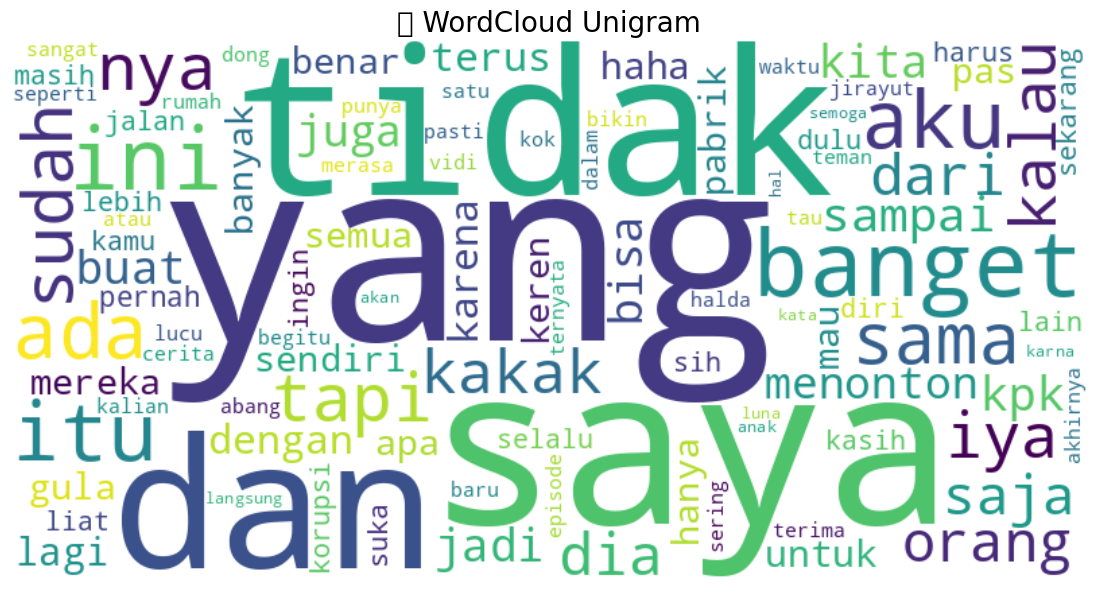

In [38]:
# === 4. Contoh penggunaan WordCloud per n-gram ===
generate_ngram_wordcloud(df['TEXT_CLEANED'], n=1, title="🔥 WordCloud Unigram")


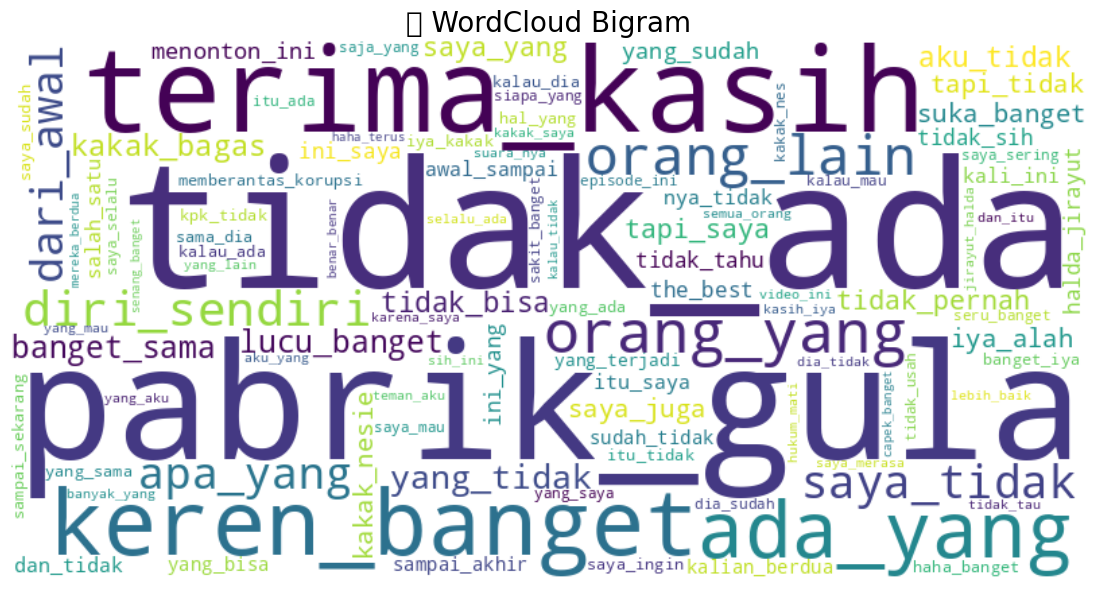

In [39]:
generate_ngram_wordcloud(df['TEXT_CLEANED'], n=2, title="🔥 WordCloud Bigram")


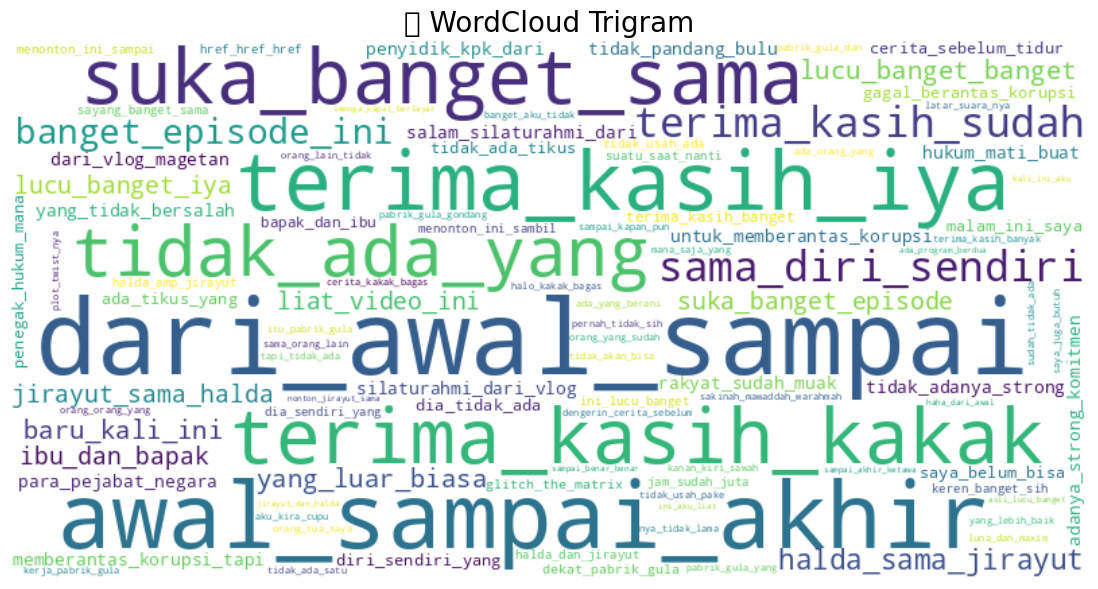

In [40]:
generate_ngram_wordcloud(df['TEXT_CLEANED'], n=3, title="🔥 WordCloud Trigram")

## KATA PALING BANYAK MUNCUL PER EMOSI

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


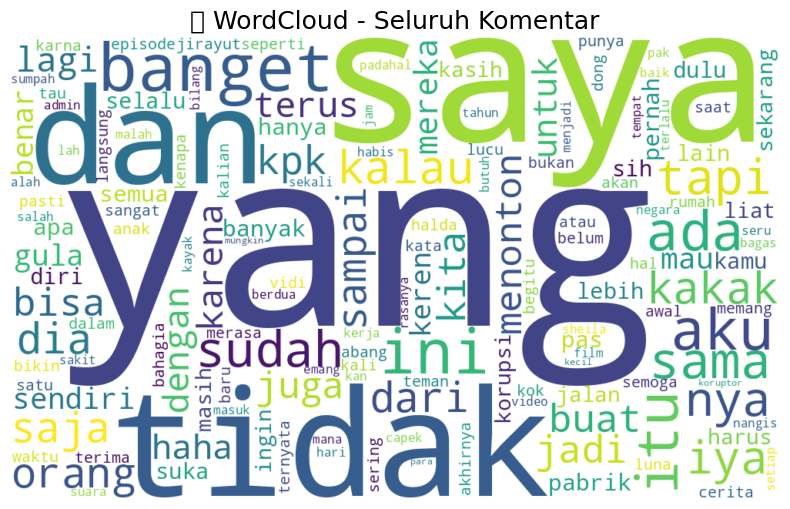

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


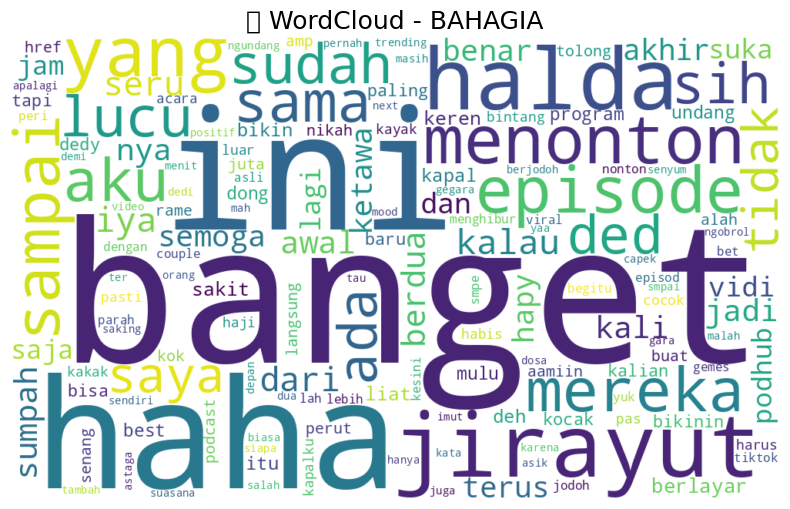

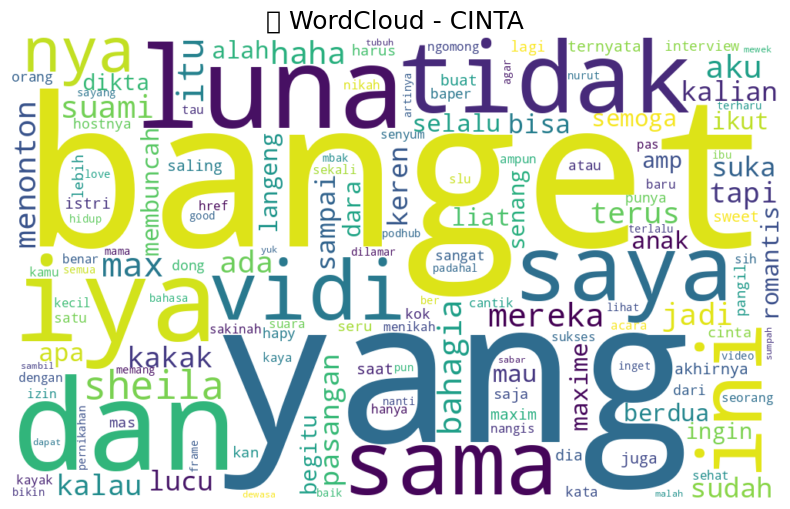

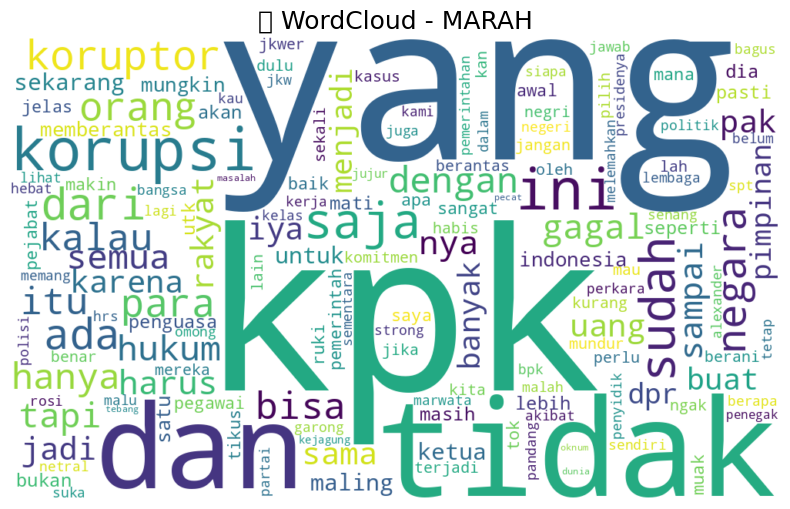

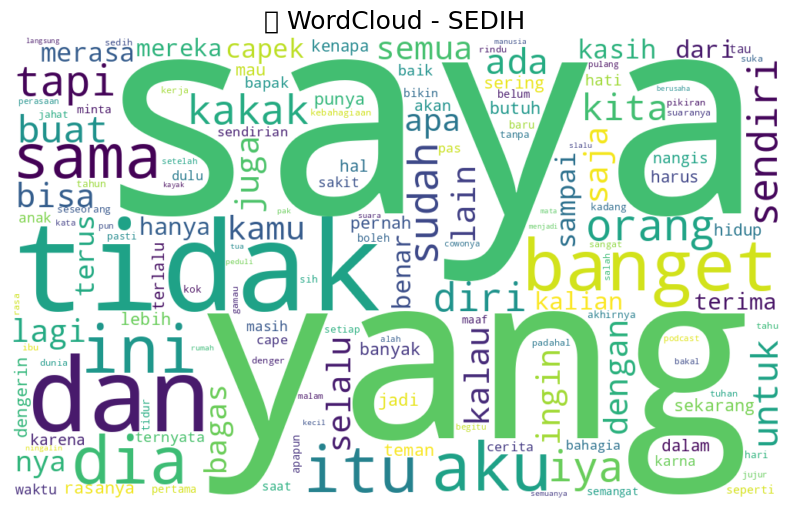

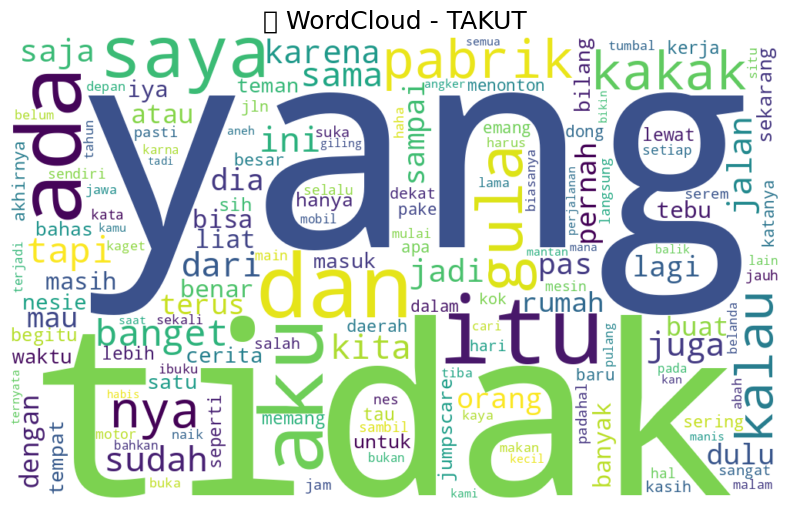

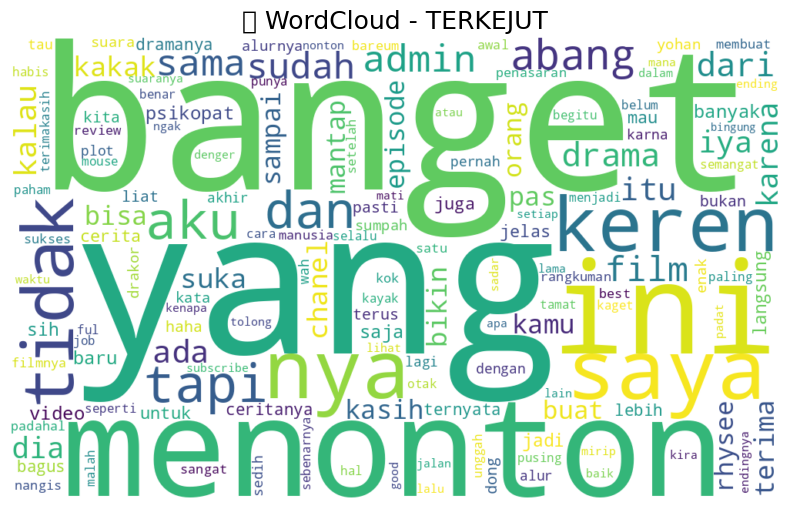

In [43]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# === 1. Load dataset hasil normalisasi ===
df = pd.read_csv("DATA_KOMENTAR_EMOSI_NORMALIZED.csv")
df['TEXT_CLEANED'] = df['TEXT_CLEANED_FIX'].fillna('')

# Pastikan kolom sudah benar
if "TEXT_CLEANED_FIX" not in df.columns:
    raise KeyError("Kolom 'TEXT_CLEANED_FIX' tidak ditemukan. Pastikan sudah dinormalisasi.")

# === 2. Fungsi buat tampilkan wordcloud ===
def buat_wordcloud(text, title):
    wordcloud = WordCloud(
        width=1000,
        height=600,
        background_color="white",
        max_words=150,
        collocations=False,  # biar gak gabung dua kata otomatis
        colormap="viridis",  # bisa diganti: plasma, inferno, rainbow, coolwarm
        font_path=None  # kalau kamu mau font Indonesia bisa tambahkan path di sini
    ).generate(" ".join(text))

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=18)
    plt.show()

# === 3. WordCloud keseluruhan ===
buat_wordcloud(df["TEXT_CLEANED"], "🌎 WordCloud - Seluruh Komentar")

# === 4. WordCloud per emosi ===
if "Emosi" in df.columns:
    for emotion in df["Emosi"].unique():
        subset = df[df["Emosi"] == emotion]["TEXT_CLEANED"]
        buat_wordcloud(subset, f"💬 WordCloud - {emotion}")
else:
    print("⚠️ Kolom 'Emosi' tidak ditemukan — hanya membuat WordCloud keseluruhan.")